# HOUSE Price Predixtion on data scraped form live website

Import Libraries

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

get all Us states

In [4]:
import us
states = []
for x in us.STATES:
        states.append('-'.join(x.name.split()))

In [5]:
states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New-Hampshire',
 'New-Jersey',
 'New-Mexico',
 'New-York',
 'North-Carolina',
 'North-Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode-Island',
 'South-Carolina',
 'South-Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West-Virginia',
 'Wisconsin',
 'Wyoming']

In [86]:
##User agent for request library to let servers and network peers identify the application
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 12_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'})

In [84]:
items = [] #list of dictionories to make DataFrame

In [86]:
def house_price(states):
    for x in states:
        st = x.split()[0]
        pg = x.split()[1]
        for y in range(1,int(pg)):
            url = f'https://www.realtor.com/realestateandhomes-search/{st}/pg-{y}'
            webpage = requests.get(url, headers=HEADERS)
            soup = BeautifulSoup(webpage.content, "lxml")
            time.sleep(5)
            for i in soup.find_all('div', class_ = 'jsx-1982357781 property-wrap'):
                try:
                    if i.find('span', class_ = 'Price__Component-rui__x3geed-0 gipzbd').text.strip().startswith('$'):
                        price = i.find('span', class_ = 'Price__Component-rui__x3geed-0 gipzbd').text
                    else:
                        price = 'NAN'
                except:
                    price = 'NAN'
                try:
                    if i.find_all('li')[0].text.strip().endswith('bed'):
                        bed = i.find_all('li')[0].text
                    else:
                        bed = 'NAN'
                except:
                    bed = 'NAN'
                try:
                    if i.find_all('li')[1].text.strip().endswith('bath'):
                        bath = (i.find_all('li')[1].text)
                    else:
                        bath = 'NAN'
                except:
                    bath = 'NAN'
                try:
                    area = (i.find_all('li')[-1].text)
                except:
                    area = 'NAN'
                print(price,bed,bath,area)

                dict1 = {'Bedrooms':bed, 'Bathrooms':bath, 'Area':area, 'Price':price }
                items.append(dict1)


In [87]:
house_price(['Alabama 206']) ##State Alabama and Number of pages to scrape

$349,000 3bed 3bath 0.53acre lot
$225,000 3bed 1.5bath 1,450sqft
$15,000 3bed 1bath 5,227sqft lot
$125,000 3bed 1.5bath 9,148sqft lot
$199,900 3bed 2.5bath 9,148sqft lot
$264,900 3bed 2bath 0.8acre lot
$109,000 3bed 1bath 0.43acre lot
$185,000 3bed 2bath 0.24acre lot
$125,000 3bed 1bath 2.1acre lot
$85,000 3bed 1bath 8,276sqft lot
$85,120 3bed 2bath 4,269sqft lot
$137,900 3bed 2bath 0.6acre lot
$212,900 3bed 2bath 0.31acre lot
$189,900 4bed 2bath 0.51acre lot
$319,900 3bed 2bath 0.31acre lot
$169,900 4bed 2bath 0.23acre lot
$320,000 3bed 2bath 7,841sqft lot
$349,900 3bed 2.5bath 1.98acre lot
$90,000 3bed 1.5bath 6,970sqft lot
$1,100,000 3bed 2.5bath 3,485sqft lot
$287,999 3bed 2bath 0.25acre lot
$225,000 3bed 1bath 1,170sqft
$399,000 3bed 2bath 1.46acre lot
$339,000 3bed 2bath 0.27acre lot
$374,900 5bed 3bath 0.69acre lot
$299,325 4bed 3bath 0.36acre lot
$319,900 3bed 2bath 0.34acre lot
$239,900 4bed 2bath 0.5acre lot
$369,000 3bed 2bath 0.88acre lot
$115,000 1bed 1bath 522sqft
$275,00

$210,000 4bed 2bath 0.34acre lot
$135,000 4bed 3bath 1acre lot
$247,000 4bed 2bath 1.25acre lot
$279,500 3bed 2bath 0.64acre lot
$245,000 3bed 2bath 5,663sqft lot
$169,900 3bed 2bath 0.34acre lot
$450,000 4bed 3bath 1acre lot
$1,690,000 4bed 5.5bath 6,000sqft
$207,000 3bed 2bath 1,307sqft lot
$449,000 4bed 3bath 0.75acre lot
$137,000 3bed 2.5bath 2,560sqft
$269,999 3bed 2.5bath 1.97acre lot
$115,000 3bed 1bath 0.35acre lot
$208,900 4bed 2bath 0.75acre lot
$295,000 4bed 3.5bath 3acre lot
$289,900 3bed 2bath 0.32acre lot
$514,900 4bed 4.5bath 0.52acre lot
$179,900 4bed 3bath 0.38acre lot
$375,000 4bed 3bath 0.54acre lot
$290,000 3bed 2bath 0.35acre lot
$369,000 4bed 2bath 13acre lot
$169,900 3bed 1bath 3.9acre lot
$275,000 4bed 4.5bath 1.16acre lot
$319,900 3bed 2bath 0.28acre lot
$179,000 3bed 2bath 1.16acre lot
$569,500 5bed 3.5bath 5.16acre lot
$245,000 4bed 2bath 1.86acre lot
$99,900 3bed 2bath 1.35acre lot
$185,000 3bed 2bath 1acre lot
$132,000 3bed 1.5bath 0.38acre lot
$199,900 3be

$79,900 3bed 2bath 3.82acre lot
$24,000 1bed 1bath 2.1acre lot
$65,000 3bed 2bath 0.86acre lot
$195,000 4bed 3bath 0.84acre lot
$70,000 3bed 2bath 9,583sqft lot
$154,900 3bed 1.5bath 9.8acre lot
$65,000 3bed 1.5bath 0.26acre lot
$249,000 3bed 2.5bath 0.37acre lot
$299,000 5bed 3bath 10.3acre lot
$159,900 3bed 2bath 0.32acre lot
$209,000 4bed 2bath 1acre lot
$143,000 4bed 2.5bath 0.29acre lot
$175,000 3bed 2bath 0.28acre lot
$369,000 3bed 2.5bath 0.39acre lot
$259,900 3bed 2bath 0.72acre lot
$395,000 4bed 3bath 0.3acre lot
$179,000 3bed 2bath 0.34acre lot
$242,000 3bed 2bath 0.45acre lot
$125,000 3bed 1bath 9,583sqft lot
$289,900 3bed 2bath 0.36acre lot
$124,900 3bed 2bath 1,250sqft
$289,900 4bed 2bath 0.42acre lot
$135,000 4bed 2bath 1,768sqft
$135,000 4bed 2bath 1,768sqft
$292,500 4bed 2bath 0.3acre lot
$649,000 5bed 4.5bath 0.69acre lot
$325,000 4bed 2.5bath 0.23acre lot
$999,900 5bed 4.5bath 0.57acre lot
$189,900 2bed 2bath 950sqft
$524,900 5bed 4.5bath 0.53acre lot
$438,500 5bed 4b

$315,395 5bed 2.5bath 2,618sqft
$288,395 3bed 2.5bath 2,164sqft
$287,395 3bed 2.5bath 2,175sqft
$285,395 4bed 2bath 1,774sqft
$329,900 4bed 2bath 1,774sqft
$329,900 4bed 2bath 1,774sqft
$320,395 5bed 3bath 2,511sqft
$274,895 4bed 2bath 1,774sqft
$332,900 4bed 2bath 1,774sqft
$334,900 4bed 2bath 1,774sqft
$375,900 4bed 2.5bath 2,315sqft
$448,700 3bed 2.5bath 2,175sqft
$404,900 4bed 3.5bath 2,531sqft
$458,900 4bed 3.5bath 2,590sqft
$480,700 4bed 2.5bath 2,632sqft
$344,900 5bed 2.5bath 2,618sqft
$357,900 5bed 3bath 2,511sqft
$406,900 4bed 3.5bath 2,543sqft
$356,900 5bed 3bath 2,511sqft
$356,900 5bed 3bath 2,511sqft
$326,152 4bed 2bath 1,835sqft
$394,220 4bed 3bath 2,486sqft
$398,328 4bed 3bath 2,304sqft
$398,328 4bed 3bath 2,304sqft
$314,900 3bed 2.5bath 1,764sqft
$314,900 3bed 2.5bath 1,764sqft
$316,900 3bed 2.5bath 1,764sqft
$316,900 3bed 2.5bath 1,749sqft
$314,900 3bed 2.5bath 1,749sqft
$316,900 3bed 2.5bath 1,764sqft
NAN 4bed 2bath 2,107sqft
$331,900 4bed 2.5bath 2,174sqft
$331,900 4b

$329,000 3bed 2.5bath 9,148sqft lot
$199,900 3bed 2bath 0.43acre lot
$449,500 4bed 3.5bath 1.63acre lot
$260,900 4bed 2bath 0.24acre lot
$479,000 4bed 3bath 0.25acre lot
$249,000 3bed 2.5bath 2.8acre lot
$184,900 3bed 2bath 0.34acre lot
$379,900 3bed 2bath 1,660sqft
$550,000 3bed 2.5bath 3,539sqft
$1,799,000 5bed 4.5+bath 1.38acre lot
$427,250 3bed 2.5bath 2,575sqft
$363,900 5bed 2.5bath 2,618sqft
$435,880 3bed 2.5bath 2,586sqft
$440,750 3bed 2.5bath 2,586sqft
$374,250 4bed 2.5bath 2,830sqft
$111,000 3bed 1bath 436sqft lot
$59,900 3bed 1.5bath 6,098sqft lot
$129,000 3bed 1bath 436sqft lot
$262,000 3bed 2bath 1,823sqft
NAN 4bed 2bath 1,787sqft
NAN 4bed 2bath 2,031sqft
NAN 3bed 2.5bath 2,175sqft
$391,090 5bed 3bath 2,409sqft
NAN 3bed 2bath 1,641sqft
NAN 5bed 3bath 2,511sqft
NAN 5bed 2.5bath 2,632sqft
NAN 4bed 2bath 1,774sqft
NAN 3bed 2.5bath 2,164sqft
NAN 4bed 2bath 1,915sqft
NAN 3bed 2bath 1,853sqft
NAN 4bed 2.5bath 2,350sqft
NAN 4bed 2bath 1,915sqft
NAN 4bed 2bath 2,047sqft
NAN 5bed 3b

$374,900 4bed 2.5bath 2.91acre lot
$1,229,000 6bed 6.5+bath 5.1acre lot
$69,900 3bed 2bath 0.6acre lot
$297,000 4bed 2bath 2,074sqft
$149,000 3bed 2bath 0.37acre lot
$325,000 4bed 2bath 0.36acre lot
$195,000 3bed 2bath 1,800sqft
$244,000 3bed 2bath 0.62acre lot
$695,000 3bed 3.5bath 4.3acre lot
$419,000 2bed 2bath 0.29acre lot
$399,000 3bed 3bath 2acre lot
$309,900 3bed 2bath 5,663sqft lot
$162,000 3bed 2bath 0.29acre lot
$315,000 3bed 2.5bath 1acre lot
$266,000 3bed 2.5bath 1,915sqft
$74,880 NAN NAN 23.4acre lot
$244,900 3bed 2bath 0.74acre lot
$420,000 5bed 3.5bath 6,098sqft lot
$235,000 4bed 2bath 1,779sqft
$140,000 2bed 1bath 9,348sqft lot
$425,000 NAN NAN 3,705sqft
$950,500 4bed 3.5bath 6acre lot
$99,900 3bed 2bath 0.6acre lot
$199,950 4bed 3.5bath 0.39acre lot
$174,900 3bed 2bath 4,356sqft lot
$399,000 3bed 3bath 2,811sqft
$175,000 3bed 1.5bath 0.47acre lot
$299,900 4bed 2bath 1.25acre lot
$239,500 3bed 2bath 0.42acre lot
$374,900 3bed 2.5bath 5acre lot
$215,000 NAN NAN 3,920sqft

$139,500 2bed 2bath 1,456sqft
$175,900 3bed 2bath 2.23acre lot
$1,475,000 5bed 6.5+bath 0.84acre lot
$134,900 3bed 2bath 0.43acre lot
$429,900 3bed 2.5bath 3.5acre lot
$729,000 4bed 3.5bath 0.45acre lot
$1,599,000 4bed 2.5+bath 0.68acre lot
$265,000 2bed 1bath 1acre lot
$312,000 3bed 2bath 20.77acre lot
$165,000 3bed 2bath 0.34acre lot
$150,000 3bed 2bath 1.5acre lot
$199,900 5bed 4bath 0.48acre lot
$659,700 3bed 2bath 0.65acre lot
$275,000 5bed 2bath 6.79acre lot
$364,900 4bed 2.5bath 0.44acre lot
$279,900 3bed 2bath 0.25acre lot
$204,900 3bed 2bath 1acre lot
$580,000 5bed 4.5bath 4.9acre lot
$350,000 2bed 2.5bath 4acre lot
$875,000 NAN NAN NAN
$49,500 3bed 2bath 1,200sqft
$55,000 NAN NAN 1acre lot
$329,900 3bed 2bath 8.8acre lot
$799,900 5bed 3.5bath 2acre lot
$279,900 3bed 2bath 0.8acre lot
$425,900 4bed 2.5bath 0.38acre lot
$315,000 3bed 2bath 0.44acre lot
$225,000 3bed 2bath 0.58acre lot
$34,900 2bed 1bath 0.42acre lot
$80,000 3bed 2bath 0.86acre lot
$249,900 3bed 2bath 1,428sqft 

$135,000 3bed 2bath 0.3acre lot
$69,000 5bed 2.5bath 0.56acre lot
$149,999 3bed 1.5bath 7,627sqft lot
$329,900 3bed 2bath 8.8acre lot
$225,000 2bed 2bath 7,514sqft lot
$199,000 3bed 2bath 0.36acre lot
$229,000 3bed 2bath 1.5acre lot
$169,000 4bed 2bath 0.33acre lot
$340,000 4bed 3bath 0.5acre lot
$165,200 4bed 1.5bath 1,913sqft
$225,000 3bed 1bath 0.24acre lot
$299,000 4bed 2.5bath 0.5acre lot
$399,000 5bed 3.5bath 3,323sqft
$275,000 3bed 2bath 0.59acre lot
$449,900 3bed 2.5bath 1,742sqft lot
$319,000 4bed 2.5bath 2,099sqft
$729,000 4bed 3.5bath 0.45acre lot
$650,000 3bed 2bath 23acre lot
$365,000 3bed 2bath 7,841sqft lot
$219,900 3bed 2.5bath 871sqft lot
$369,900 3bed 3bath 2,718sqft
$339,900 3bed 2bath 7,405sqft lot
$699,900 4bed 2.5bath 1acre lot
$333,400 5bed 3bath 2,511sqft
$293,400 4bed 2bath 1,774sqft
$280,400 4bed 2bath 1,497sqft
$2,300,000 5bed 4.5bath 1.65acre lot
NAN 3bed 2bath 1,895sqft
$429,000 3bed 2bath 8,276sqft lot
NAN 5bed 3.5bath 4,696sqft
NAN 5bed 4bath 4,278sqft
$6

$99,900 3bed 2bath 1.34acre lot
$229,900 4bed 3bath 0.96acre lot
$115,000 3bed 2bath 0.93acre lot
$279,900 3bed 2bath 0.42acre lot
$49,500 2bed 1bath 8,276sqft lot
$319,000 NAN NAN 40.03acre lot
$259,900 4bed 2.5bath 0.53acre lot
NAN 4bed 2.5bath 2,565sqft
$395,000 4bed 2.5bath 0.84acre lot
$359,900 3bed 2bath 0.23acre lot
NAN 4bed 2bath 2,191sqft
NAN 4bed 3.5bath 2,503sqft
$399,000 2bed 2bath 1,522sqft
NAN 4bed 4.5bath 2,909sqft
NAN 4bed 4.5bath 3,310sqft
NAN 3bed 2bath 1,535sqft
NAN 4bed 3bath 2,751sqft
$549,000 3bed 2bath 0.24acre lot
$273,000 3bed 3bath 1,424sqft
NAN 4bed 4.5bath 3,054sqft
NAN 4bed 3.5bath 3,172sqft
NAN 5bed 3.5bath 2,954sqft
NAN 3bed 2bath 1,679sqft
$300,000 NAN NAN 15acre lot
$339,900 3bed 2bath 0.65acre lot
$349,900 3bed 2.5bath 2,270sqft
$329,900 3bed 3bath 1,370sqft
$699,000 3bed 2.5bath 5,227sqft lot
NAN 3bed 2bath 1,650sqft
NAN 5bed 3bath 3,097sqft
$568,000 1bed 1bath 800sqft
NAN 4bed 2bath 1,791sqft
$509,900 4bed 3.5bath 0.41acre lot
NAN 5bed 4bath 3,259sqf

$985,000 4bed 4.5bath 1.5acre lot
$99,900 4bed 2.5bath 2.5bath
$189,000 3bed 2.5bath 540sqft lot
$135,000 3bed 1bath 1acre lot
$285,000 3bed 2bath 1.87acre lot
$59,000 3bed 2bath 0.36acre lot
$3,600,000 5bed 1bath 1,155acre lot
$400,000 3bed 2.5bath 20acre lot
$339,000 4bed 2bath 0.5acre lot
$339,900 5bed 4bath 3,500sqft
$338,000 4bed 2.5bath 0.72acre lot
$825,000 5bed 3.5bath 10.46acre lot
$705,287 7bed 4bath 1.45acre lot
$175,000 3bed 2bath 2.62acre lot
$169,900 3bed 2bath 11.23acre lot
$950,000 4bed 2.5bath 141acre lot
$125,000 4bed 2bath 0.35acre lot
$25,000 NAN NAN 3acre lot
$899,900 3bed 2.5bath 3acre lot
$207,000 3bed 2bath 4,356sqft lot
$469,900 3bed 3.5bath 0.51acre lot
$219,900 3bed 2bath 1acre lot
$390,000 4bed 2bath 0.46acre lot
$224,900 3bed 2bath 1,308sqft
$649,000 2bed 2bath 20acre lot
$145,000 3bed 2bath 4acre lot
$224,900 2bed 2bath 5,112sqft lot
$210,000 3bed 2bath 0.57acre lot
$79,900 2bed 1bath 1,250sqft
$849,900 4bed 5bath 1.42acre lot
$285,000 4bed 3.5bath 3,000sq

$30,000 3bed 2bath 0.31acre lot
$175,000 3bed 2bath 1.13acre lot
$78,000 4bed 2bath 0.3acre lot
$275,000 5bed 3bath 5acre lot
$135,000 3bed 1bath 0.38acre lot
$196,900 3bed 2bath 0.3acre lot
$115,000 3bed 1.5bath 0.24acre lot
$210,000 4bed 2.5bath 0.24acre lot
$210,000 4bed 2.5bath 0.24acre lot
$259,900 3bed 2bath 0.26acre lot
$109,900 3bed 1bath 9,583sqft lot
$259,900 3bed 2bath 0.49acre lot
$170,000 4bed 2bath 0.45acre lot
$210,000 3bed 2bath 1,332sqft
$234,000 3bed 2bath 0.68acre lot
$299,900 3bed 2bath 0.27acre lot
$225,000 4bed 2.5bath 0.49acre lot
$270,000 3bed 3bath 0.5acre lot
$249,000 3bed 2bath 0.43acre lot
$396,900 4bed 3bath 0.93acre lot
$410,000 4bed 3bath 0.5acre lot
$359,000 2bed 1.5bath 20.03acre lot
$319,000 4bed 2bath 6,970sqft lot
$353,250 5bed 3bath 2,511sqft
$379,900 3bed 2bath 1,881sqft
$369,900 3bed 2bath 0.5acre lot
$1 2bed 1bath 6,250sqft lot
$319,900 4bed 2bath 2,117sqft
$246,180 3bed 2.5bath 5,663sqft lot
NAN 3bed 2bath 1,501sqft
$799,900 4bed 4.5bath 2.16acr

$374,900 4bed 3bath 2,273sqft
$179,900 3bed 2bath 0.5acre lot
$574,000 3bed 2bath 72acre lot
$399,899 4bed 3bath 2,667sqft
$457,738 4bed 3bath 2,486sqft
$789,900 2bed 2bath 0.5acre lot
$445,999 5bed 3.5bath 3,132sqft
$441,250 4bed 2.5bath 2,306sqft
$286,395 4bed 2bath 1,774sqft
$299,900 4bed 2bath 1,774sqft
$524,900 4bed 4.5bath 0.9acre lot
$342,400 5bed 2.5bath 2,618sqft
$337,680 3bed 2.5bath 2,033sqft
$284,900 4bed 3bath 1,964sqft
$412,396 6bed 3bath 3,144sqft
$359,900 4bed 2.5bath 2,572sqft
$356,460 4bed 3bath 2,117sqft
$375,000 3bed 3bath 2,718sqft
$374,900 3bed 3bath 2,718sqft
$389,990 4bed 3bath 2,907sqft
$90,000 NAN NAN 40acre lot
$153,900 3bed 2bath 1acre lot
$769,000 3bed 3bath 4,871sqft
$349,990 4bed 3bath 2,117sqft
$353,000 4bed 2.5bath 2,306sqft
$75,000 3bed 1bath 0.9acre lot
$362,900 4bed 2.5bath 2,516sqft
$374,900 4bed 3.5bath 2,661sqft
$362,900 4bed 2.5bath 2,516sqft
$353,000 4bed 2.5bath 2,306sqft
$344,990 4bed 3bath 2,117sqft
$328,725 4bed 2bath 2,180sqft
$269,848 3bed

$79,900 3bed 2bath 2.17acre lot
$175,000 3bed 1.5bath 0.47acre lot
$340,000 4bed 2.5bath 11acre lot
$70,000 2bed 1bath 1,020sqft
$145,000 3bed 2bath 0.43acre lot
$90,000 NAN NAN 16acre lot
$277,563 3bed 2.5bath 0.97acre lot
$129,900 3bed 2bath 0.34acre lot
$65,000 4bed 2bath 0.23acre lot
$225,000 3bed 2bath 0.24acre lot
$129,900 3bed 1bath 1,730sqft
$176,000 3bed 2bath 0.33acre lot
$210,000 3bed 2bath 0.25acre lot
$292,000 4bed 2bath 0.41acre lot
$180,000 3bed 1.5bath 0.4acre lot
$269,999 3bed 2.5bath 1.97acre lot
$449,000 5bed 3bath 2acre lot
$224,900 3bed 2bath 9,148sqft lot
$1,100,000 6bed 5.5+bath 0.67acre lot
$505,000 5bed 4bath 0.29acre lot
$445,095 3bed 2bath 2,040sqft
$60,000 NAN NAN 0.94acre lot
$10,000 NAN NAN 0.45acre lot
$750,000 4bed 3.5bath 1.3acre lot
$29,900 NAN NAN 0.43acre lot
$499,900 4bed 2bath 0.39acre lot
$1,575,000 5bed 4bath 0.8acre lot
$369,000 3bed 2.5bath 7,841sqft lot
$269,000 3bed 2bath 0.24acre lot
$303,445 3bed 2.5bath 0.25acre lot
$20,000 NAN NAN 0.54acr

KeyboardInterrupt: 

### Now Data has been scraped from website 'https://www.realtor.com' Now It't time to preprocess that data

In [88]:
df = pd.DataFrame(items)

In [90]:
df

,Bedrooms,Bathrooms,Area,Price
0,3bed,3bath,0.53acre lot,"$349,000"
1,3bed,1.5bath,"1,450sqft","$225,000"
2,3bed,1bath,"5,227sqft lot","$15,000"
3,3bed,1.5bath,"9,148sqft lot","$125,000"
4,3bed,2.5bath,"9,148sqft lot","$199,900"
...,...,...,...,...
3565,NAN,NAN,0.5acre lot,"$24,500"
3566,3bed,2bath,"1,376sqft","$785,000"
3567,4bed,2bath,0.86acre lot,"$375,000"
3568,3bed,2.5bath,"4,356sqft lot","$374,900"


### First of all find and then delete NAN Values

In [150]:
for i  in df.Area:
    if ('acre' in i) or ('sqft' in i):
        pass
    else:
        print(i)

NAN
2bath
NAN
NAN
NAN
NAN
NAN
NAN
4bath
2.5bath
2.5bath
2bath
3bath
2.5bath
3bath
NAN
2.5bath
NAN
NAN
NAN
NAN
NAN
NAN
NAN
NAN
3bath
3bath
10bath
NAN
NAN
NAN
NAN
NAN
NAN
NAN
NAN
NAN
2bath
4bath
NAN
NAN
NAN
NAN
NAN
NAN


In [101]:
new_dfa = df[(dfa['Bedrooms']!='NAN')&(dfa['Bathrooms']!='NAN')&(dfa['Area']!='NAN')&(dfa['Price']!='NAN')]

In [102]:
new_dfa

,Bedrooms,Bathrooms,Area,Price
0,3bed,3bath,0.53acre lot,"$349,000"
1,3bed,1.5bath,"1,450sqft","$225,000"
2,3bed,1bath,"5,227sqft lot","$15,000"
3,3bed,1.5bath,"9,148sqft lot","$125,000"
4,3bed,2.5bath,"9,148sqft lot","$199,900"
...,...,...,...,...
3564,5bed,2.5bath,"8,276sqft lot","$485,000"
3566,3bed,2bath,"1,376sqft","$785,000"
3567,4bed,2bath,0.86acre lot,"$375,000"
3568,3bed,2.5bath,"4,356sqft lot","$374,900"


#### Now NAN Values has been deleted. You can save dataframe in csv with "df.to_csv("finename.csv")"

In [103]:
new_dfa.to_csv('houses.csv', index=False)

In [104]:
houses = pd.read_csv('houses.csv')

In [112]:
houses['Bedrooms'] = houses['Bedrooms'].str.get(0).astype('int')

In [118]:
houses.head(3)

,Bedrooms,Bathrooms,Area,Price
0,3,3bath,0.53acre lot,"$349,000"
1,3,1.5bath,"1,450sqft","$225,000"
2,3,1bath,"5,227sqft lot","$15,000"


### After Deleting NAN values from data Now we make the data in the form that machine can understand

In [136]:
houses['Bathrooms'] = houses['Bathrooms'].str.get(0).astype('int')

In [137]:
houses.head()

,Bedrooms,Bathrooms,Area,Price
0,3,3,0.53acre lot,"$349,000"
1,3,1,"1,450sqft","$225,000"
2,3,1,"5,227sqft lot","$15,000"
3,3,1,"9,148sqft lot","$125,000"
4,3,2,"9,148sqft lot","$199,900"


### Now we have to convert Area in the same format either in sqft or acre 

In [172]:
def areatosqft(area):
    if 'acre' in area:
        return round(float(area.split('acre')[0].replace(',', ''))*43560,2)
    elif 'sqft' in area:
        return float(area.split('sqft')[0].replace(',', ''))
    else:
        return float('NAN') ## NAN is by default float value if it is a string than we have to convert it to float so it can be deleted

houses['Areasqftt'] = houses.Area.apply(areatosqft)

In [154]:
float('NAN')

nan

In [175]:
houses.head

,Bedrooms,Bathrooms,Area,Price,Areasqrt
0,3,3,0.53acre lot,"$349,000",23086.8
1,3,1,"1,450sqft","$225,000",1450.0
2,3,1,"5,227sqft lot","$15,000",5227.0
3,3,1,"9,148sqft lot","$125,000",9148.0
4,3,2,"9,148sqft lot","$199,900",9148.0
...,...,...,...,...,...
2890,5,2,"8,276sqft lot","$485,000",8276.0
2891,3,2,"1,376sqft","$785,000",1376.0
2892,4,2,0.86acre lot,"$375,000",37461.6
2893,3,2,"4,356sqft lot","$374,900",4356.0


In [177]:
houses.dropna(inplace=True)

In [179]:
houses.head()

,Bedrooms,Bathrooms,Area,Price,Areasqrt
0,3,3,0.53acre lot,"$349,000",23086.8
1,3,1,"1,450sqft","$225,000",1450.0
2,3,1,"5,227sqft lot","$15,000",5227.0
3,3,1,"9,148sqft lot","$125,000",9148.0
4,3,2,"9,148sqft lot","$199,900",9148.0


In [188]:
houses['Price'] = houses['Price'].str.replace('$','').str.replace(',','').astype('int')

<ipython-input-188-0b9ac2d0d0b6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  houses['Price'] = houses['Price'].str.replace('$','').str.replace(',','').astype('int')


In [189]:
houses ##mistakenly written sqrt

,Bedrooms,Bathrooms,Area,Price,Areasqrt
0,3,3,0.53acre lot,349000,23086.8
1,3,1,"1,450sqft",225000,1450.0
2,3,1,"5,227sqft lot",15000,5227.0
3,3,1,"9,148sqft lot",125000,9148.0
4,3,2,"9,148sqft lot",199900,9148.0
...,...,...,...,...,...
2890,5,2,"8,276sqft lot",485000,8276.0
2891,3,2,"1,376sqft",785000,1376.0
2892,4,2,0.86acre lot,375000,37461.6
2893,3,2,"4,356sqft lot",374900,4356.0


In [190]:
houses = houses.drop('Area', axis=1)

In [92]:
houses.head()

,Bedrooms,Bathrooms,Price,Areasqft
0,3,3,349000,23086.8
1,3,1,225000,1450.0
2,3,1,15000,5227.0
3,3,1,125000,9148.0
4,3,2,199900,9148.0


In [192]:
houses.to_csv('houses2.csv', index=False)

In [89]:
house_df = pd.read_csv('houses2.csv')

In [90]:
house_df.head()

,Bedrooms,Bathrooms,Price,Areasqft
0,3,3,349000,23086.8
1,3,1,225000,1450.0
2,3,1,15000,5227.0
3,3,1,125000,9148.0
4,3,2,199900,9148.0


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

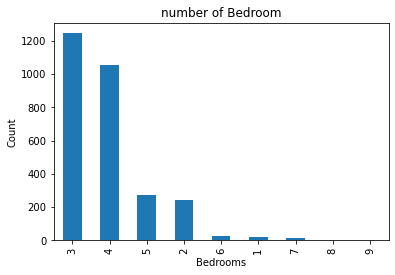

In [7]:
house_df['Bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

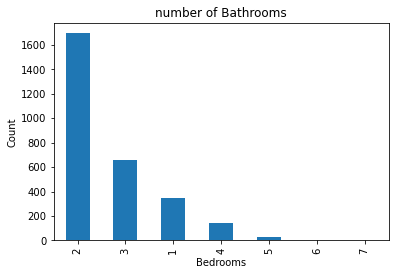

In [8]:
house_df['Bathrooms'].value_counts().plot(kind='bar')
plt.title('number of Bathrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

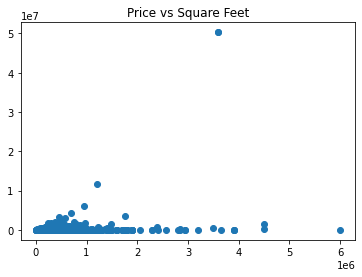

In [9]:
plt.scatter(house_df['Price'],house_df['Areasqrt'])
plt.title("Price vs Square Feet")

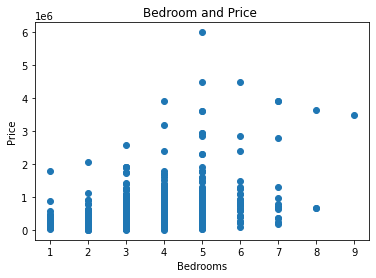

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [11]:
plt.scatter(house_df['Bedrooms'],house_df['Price'])
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

In [69]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

In [28]:
labels = house_df['Price']
train1 = house_df.drop(['Price'],axis=1)


In [56]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20)

In [60]:
x_train

,Bedrooms,Bathrooms,Areasqrt
1808,6,3,871200.0
1124,3,1,1648746.0
1797,4,3,141570.0
498,3,1,11325.6
43,3,2,82764.0
...,...,...,...
1987,4,2,77536.8
1099,3,2,8276.0
211,3,2,217800.0
655,2,1,178596.0


In [79]:
lasso_cv = LassoCV(cv=10)

In [80]:
lasso_cv.fit(x_train,y_train)

LassoCV(cv=10)

In [57]:
reg.fit(x_train,y_train)

LinearRegression()

In [84]:
lasso_cv.predict([[3,3,140]])

array([357687.43381319])